# Apprentissage non-supervisé

* Au lieu de montrer des exemples (X, y) de ce qu'elle doit apprendre
* On montre à la machine que X
* À elle d'analyser la structure de ces données 
* Avec l'apprentissage non supervisé on peut: 
    * Apprendre à classer 
        * C'est du clustering (de la classification)
        * Classer des docs, des photos, des tweets, segmentation Mktg
        * Algo : K-Means Clustering (from sklearn.cluster import KMeans)
    * Détecter des anomalies
        * Identifies les échantillons dont les caractéristiques sont très éloignées des précédents
        * Système de sécurité, détection hacking, fraude bancaire, défaut en prod
        * Algo : Isolation Forest (from sklearn.ensemble import IsolationForest)
    * Réduction de dimension
        * La machine apprend a simplifier tout en gardant les infos principales
        * Projection dans un espace de dimension moindre
        * Simplifier un dataset pour aider ensuite à résoudre des questions de régression ou classification, réduire le dataset MNIST de 784 à 3 dimmensions 
        * Algo : PCA - Analyse en composantes principales


## K-Means Clustering - Apprendre à classer

* Laisser la machine classer les données en fonction de leur ressemblance
* Exemple : 
    * on veut classer les données en 3 cluster
    * on place 3 centroïdes au hasard
    * on affect chaque point au centroid le plus proche
    * on détermine 3 cluster
    * on déplace chaque centroid au centre de son cluster
    * on recommence
    * on continue jusqu'à ce que les centroides ne bougent plus
    * ![Alt text](assets/Non_Supervise.png)

Fonctionnement en 2 étapes
1. Affectation des points au centre le plus proche
1. Déplacer le centroïd au milieu du cluster 

En fonction des positions initiales les centroïdes peuvent ne pas converger où il faut :

![Alt text](assets/Non_Supervise2.png)

* Pour éviter ce problème on execute plusieurs fois l'algo en changent les positionns initiales de centroïdes. 
* On retient la solution qui minimise la somme des distances entre le centre $\mu_j$ et les points du cluster $x_i$

![Alt text](assets/Non_Supervise3.png)

* Minimiser une fonction coût nommé Inertia
* $\sum_{i=0}^{n}min(||x_i - \mu_j||^2)   $
* Cela revient à minimiser la variance des clusters


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

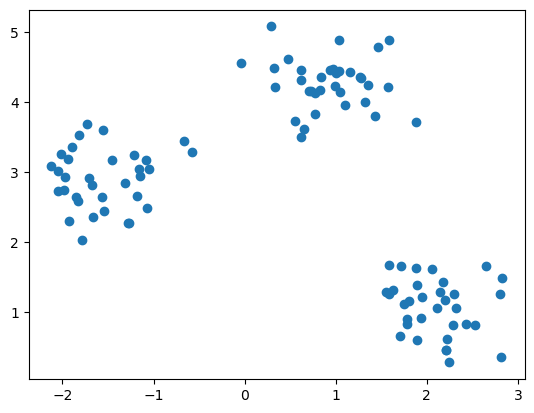

In [78]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [79]:
from sklearn.cluster import KMeans

In [80]:
model = KMeans(n_clusters=3) # n_init=10 par défaut
                             # max_iter=300 par défaut
                             # init= la méthode d'initialisation
                             # Par défaut c'est K-Means++ qui place les centroids sur des points éloignés les uns des autres
model.fit(X)                             

c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [81]:
model.labels_ # permet de voir comment les points ont été affectés

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0])

In [82]:
model.predict(X)

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0])

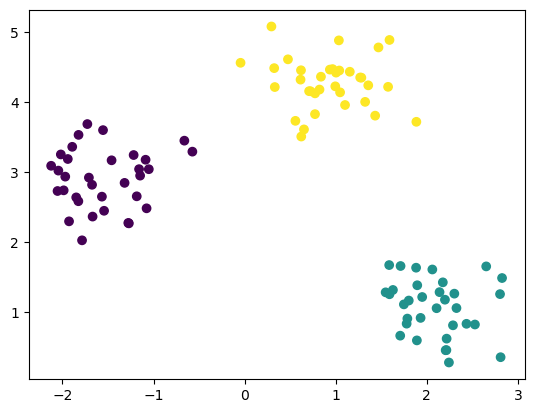

In [83]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

In [84]:
# afficher la position des centroides
model.cluster_centers_

array([[-1.55022199,  2.90542155],
       [ 2.08889087,  1.07930405],
       [ 0.92702654,  4.27385438]])

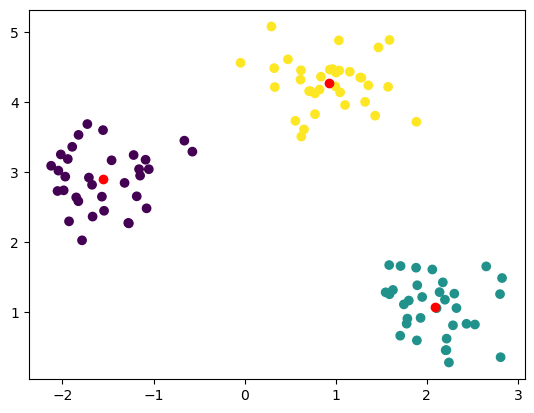

In [85]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], 
            model.cluster_centers_[:,1],
            c="red")

In [86]:
# Si on a un nouveau point
# On calcule sa distance aux centroides
# La plus courte permettra de déterminer son cluster/catégorie

In [87]:
# Fonction Inertia
print(model.inertia_)
print(model.score(X))

# Attention aux unités

30.87053128014067
-30.870531280140675


### Note
* On peut utiliser K-Means comme un Transformer
* Il a une fonction fit_transform()
* On peut récupérer la distance entre chaque point du cluster et son centroïde

 ### Comment être sûr de choisir le bon nombre de clusters?
* Ici c'était facile. On voyait
* Quid des cas où on voit pas, où il y a beaucoup de dimmensions etc.
* Elbow Method : détecter une zone de coude dans la minimisation de inertia_

 ![Alt text](assets/Non_Supervise4.png)



c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Coût du model (Inertia)')

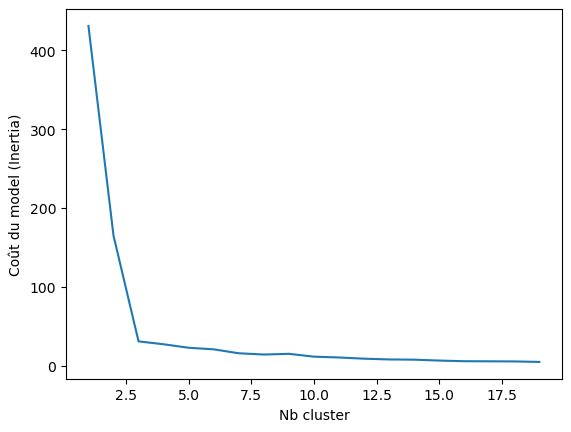

In [88]:
inertia = []
K_range = range(1,20)

for k in K_range:
  model = KMeans(n_clusters=k, n_init="auto").fit(X)
  inertia.append(model.inertia_)

fig, ax = plt.subplots()
ax.plot (K_range, inertia)  
ax.set_xlabel("Nb cluster")
ax.set_ylabel("Coût du model (Inertia)")


### D'autres algos de clustering

https://scikit-learn.org/stable/modules/clustering.html#clustering

À retenir/étudier :
* DBSCAN et AgglomerativeClustering : cluster non convexe ou anisotrope
* SpectralClustering

## Isolation Forest - Détecter des anomalies

* On calcule moy et ecart type des données 
* On détermine une fonction densité de probabilité
* Utiliser cette fonction pour calculer la probabilité qu'un point appartienne à la distribution
* Sous un certains seuil l'échantillon est considéré "anormal"

![Alt text](assets/Non_Supervise5.png)

On va voir une autre méthode, plus moderne et plus efficace : **Isolation Forest**
* On fait un nombre de split aléatoires
* On compte le nombre de split qu'il faut pour pouvoir isoler un echantillon 
* Plus le nombre de split est faible plus il y a de chance que l'échantillon soit une anomalie 

![Alt text](assets/Non_Supervise6.png)

### Etait-ce de la chance ?
* Quand le point est loin du groupe, on a beaucoup de chance de poser 2 verticales qui isolent le point 

![Alt text](assets/Non_Supervise7.png)

* Pour isoler un point dans le groupe faut des traits très très proches. C'est beaucoup moins probable de poser 2 verticales

![Alt text](assets/Non_Supervise8.png)

Attention. Il est possible, même si la proba est faible, d'isoler un échantillon du groupe avant d'isoler une anomalie. 
* On va générer plusieurs estimateurs qui vont chacun dérouler une sequence de splits aléatoires.
* On regarde ensuite la moyenne des résultats. On peut discalifier les moins probables
* On parle de Technique d'Ensemble car on utilise plurieurs estimateurs et on considère l'ensemble de leurs estimations

A noter : 
* Isolation forest est un ensemble de générateurs de type arbre (d'où le nom, forêt)
* Chaque split correspond à un embranchement



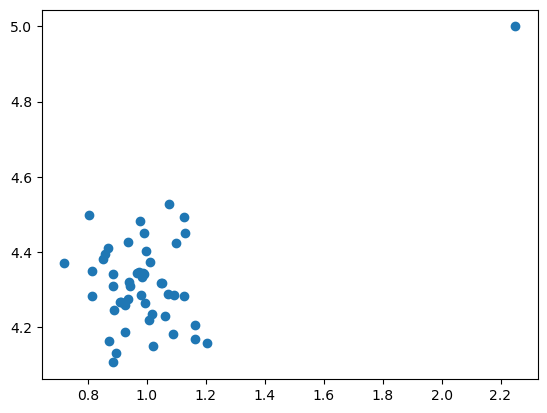

In [89]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [90]:
from sklearn.ensemble import IsolationForest

In [91]:
model = IsolationForest(contamination=0.01) # taux de contamination en %. auto par defaut
model.fit(X)

IsolationForest(contamination=0.01)

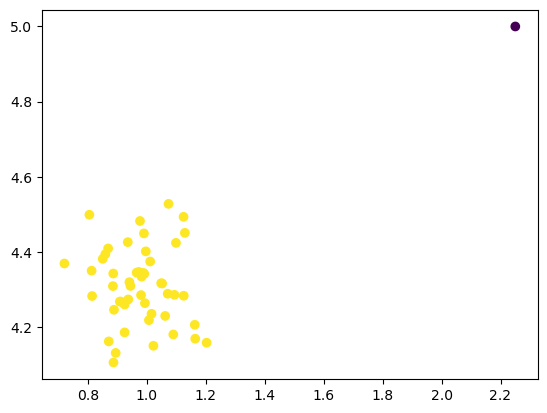

In [92]:
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

## Application

* On peut s'en servir pour nettoyer un dataset.
* On va nettoyer le dataset Digit de sklearn


In [93]:
from sklearn.datasets import load_digits

In [94]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape

(1797, 64)

1797 images de 64 pixels

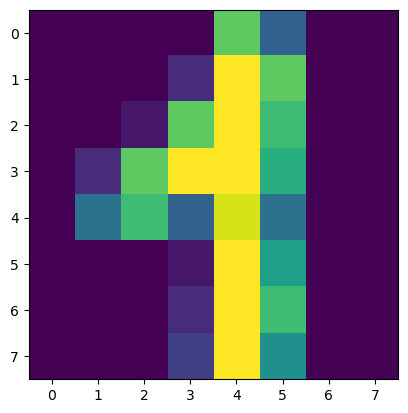

In [95]:
plt.imshow(images[42])

In [96]:
# Nettoyer le dataset des images mal écrites
model = IsolationForest(random_state=0, contamination=0.02)

In [97]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [98]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

Ce tableau ne contient que des 1 et des -1

* 1 : normal
* -1 : anomalie

On va filter et afficher tout ça avec boolean indexing


In [99]:
# Outliers contient toutes les prédictions égales à -1
# Y aura True quand l'image ne fait pas partie du groupe
outliers = model.predict(X) == -1
outliers

array([False, False, False, ..., False, False, False])

In [100]:
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [101]:
images[outliers][0]


array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

Text(0.5, 1.0, '2')

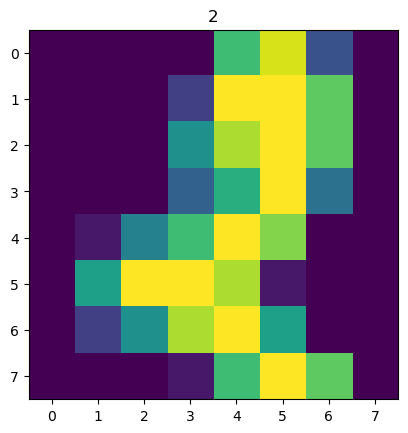

In [102]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

### Conclusion
* IsolationForest() est l'un des meilleurs algo de sa catégorie
* Point fort : analyse de très grand dataset (lié aux arbres binaires)
* À étudier : l'algo Local Outlier Factor. 
    * Repose sur la méthode des voisins les plus proches.
    * Permet de faire de la Novelty Detection

La détection d'anolmalie contient :
1. Detection d'anomalies **dans le Train set**
    * Outlier Detection
    * IsolationForest()
1. Détection d'anomalie **dans les données futures**
    * Novelty Detection
    * Local Outlier Factor

## PCA - Réduction de dimension

* Réduire la complexité superflue d'un dataset en projetant ses données dans un espaces de plus petite dimmensions
* Un espaces avec moins de variables
* Permet 
    * d'accélérer l'apprentissage
    * lutter contre le fléau de la dimmension (risque d'over fitting)
* PCA = analyse en composantes principales

Principe :
* projeter les donnes sur des axes appelés Composantes Principales
* On cherche à minimiser la distance entre les points et leur projections

![Alt text](assets/Non_Supervise9.png)

* On réduit la dimension tout en préservant au maximum la variance des données

![Alt text](assets/Non_Supervise10.png)

On veut donc 
* préserver au max la variance
* pour obtenir la projection la plus fidèle

Principe mathématique
1. On calcule de la matrice de covariance des données (TO DO)
1. On détermine les vecteurs propres (composantes principales)
1. On projette sur ces axes

![Alt text](assets/Non_Supervise11.png)





PCA est un transformer

### Mise en oeuvre
```python
from sklearn.decomposition import PCA

model = PCA(n_components=10) # le nb d'axe sur lesquels faire les projections
X_reduced = model.fit_transform(X)
```



### Comment déterminer le n_components ?

2 cas possibles:
1. On veut visualiser dans un espace 2D ou 3D. n_components = 2 ou 3  
1. On veut compresser les données pour accélérer l'apprentissage de la machine sur des taches de classification ou de régression. Faut chosir le n_components de telle sorte qu'on conserve **95 à 99% de la variance des données**

![Alt text](assets/Non_Supervise12.png)

### Application - Visualisation de données

In [103]:
from sklearn.decomposition import PCA

In [104]:
# On reprend les images
from sklearn.datasets import load_digits
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape

(1797, 64)

On a donc 64 variables qu'on va tenter de projeter dans un espace 2D pour les visualiser

In [105]:
model = PCA(n_components=2)
model.fit_transform(X)

array([[ -1.25946835,  21.27488393],
       [  7.95760937, -20.7686985 ],
       [  6.99192545,  -9.95598784],
       ...,
       [ 10.80128522,  -6.96025249],
       [ -4.87210461,  12.4239539 ],
       [ -0.3443862 ,   6.36554898]])

In [106]:
model.fit_transform(X).shape

(1797, 2)

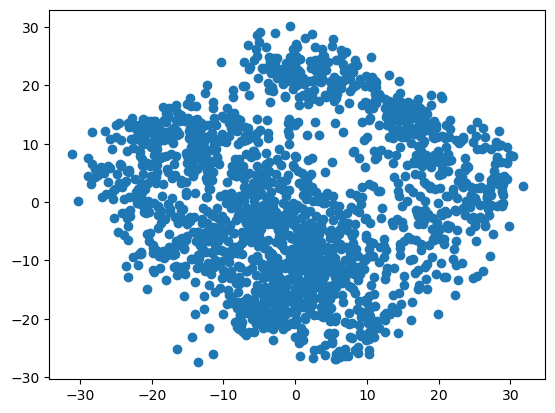

In [107]:
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

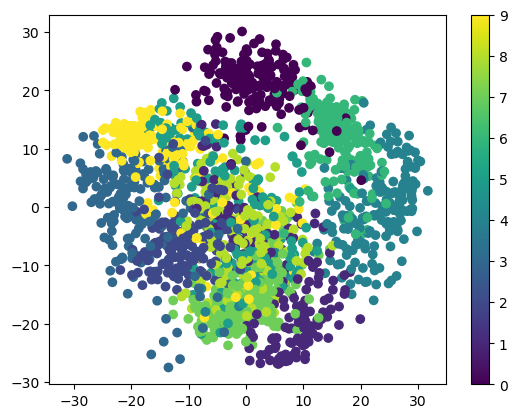

In [108]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y ) # y contient les étiquetes 0, 1, 2, ...
plt.colorbar()

À quoi correspondent les axes?

In [109]:
print(model.components_.shape)
print(model.components_)

(2, 64)
[[-1.11022302e-16 -1.73094634e-02 -2.23428820e-01 -1.35913298e-01
  -3.30323245e-02 -9.66340943e-02 -8.32943432e-03  2.26900265e-03
  -3.20516533e-04 -1.19308906e-01 -2.44451677e-01  1.48512750e-01
  -4.67319463e-02 -2.17740746e-01 -1.48136655e-02  4.47779734e-03
  -4.94136850e-05 -7.95419481e-02  8.33951325e-02  2.15915350e-01
  -1.72126823e-01 -1.63712085e-01  2.86444652e-02  4.23251939e-03
   9.85488349e-05  6.42319033e-02  2.54093309e-01 -3.56770886e-02
  -2.09462587e-01 -4.31311192e-02  5.13118869e-02  2.13422789e-04
   0.00000000e+00  1.59950876e-01  3.68690785e-01  1.64406851e-01
   8.52007888e-02  3.72982768e-02  2.15866939e-02  0.00000000e+00
   1.28865577e-03  1.06945277e-01  3.03067450e-01  2.47813032e-01
   2.09637304e-01  1.22325182e-02 -3.69458579e-02  1.61485051e-03
   6.93023514e-04 -8.35144245e-03 -5.58598944e-02  9.30534130e-02
   1.07387733e-01 -1.37734552e-01 -6.32879425e-02  9.61673843e-04
   9.55078165e-06 -1.40786823e-02 -2.35675474e-01 -1.41225581e-01
  

* Chaque composante contient 64 valeurs
* Chaque composantes est une combinaison linéaire des 64 variables du dataset
* 

### Application - Compression de données

* Le but est de préserver 95-99% de la variance
* On commence par entrainer sur le même nb de dimmension que celui qu'on a dans X (64 ici)
* On examine le % de variance préservé par chacune des composantes
* On fait la somme cumulée de tous ces pourcentages
* On cherche les indices où on est entre 95 et 99% (np.argmax)
* On re-entraine le modèle avec le bon nombre d'axes principaux 
* On est sûr d'avoir entrainé le modèle tout en preseervant 95 à 99% de la variance des données


In [110]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape





(1797, 64)

In [111]:
# On commence par entrainer sur le même nb de dimmension que celui qu'on a dans X (64 ici)
model = PCA(n_components=64) 
X_reduced = model.fit_transform(X)

In [112]:
# On examine le % de variance préservé par chacune des composantes
model.explained_variance_ratio_


array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [113]:
# On fait la somme cumulée de tous ces pourcentages
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

On part de 0.14 et on arrive à 1.00 bien sûr.

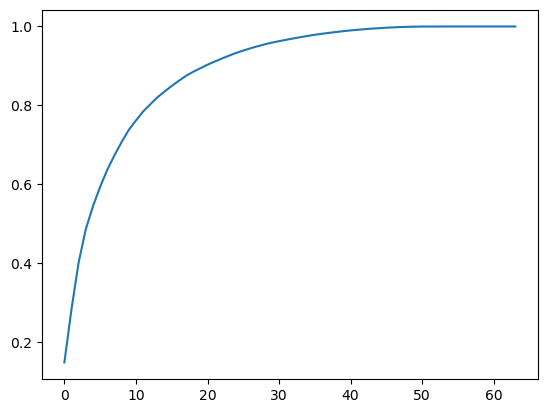

In [114]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [120]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > .95)


28

In [121]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > .99)


40

A partir de la 40 eme composante principale on atteint 99% de la variance du modèle

In [122]:
# On re-entraine le modèle avec le bon nombre d'axes principaux 
model = PCA(n_components=40) 
X_reduced = model.fit_transform(X)


### Voir à quoi ressemblent les images une fois compressées

* Il faut les décompresser de 2 à 64 pixels
* Les données ne vont pas retrouver leur position d'origine
* On repositionne les axes (composantes principale) là où ils ont été calculé dans le dataset

* C'est là qu'on avait posé la composante principale au départ

![Alt text](assets/Non_Supervise13.png)

* On préservait au max la variance
    
![Alt text](assets/Non_Supervise14.png)

* Ca c'est que l'on a au départ de la transformation inverse

![Alt text](assets/Non_Supervise15.png)

* On replace l'axe principal (et les données projetées) là où ils ont été calculés dans le dataset mais on ne peux pas revenir aux données que l'on a projeté sur l'axe principal

![Alt text](assets/Non_Supervise16.png)

In [125]:
X_recovered = model.inverse_transform(X_reduced)

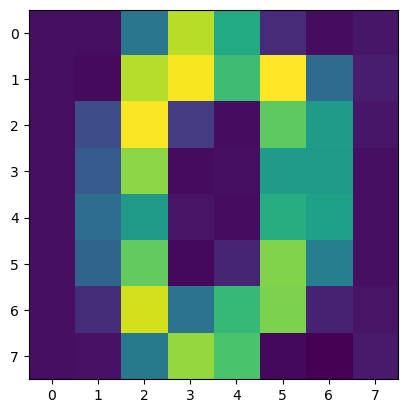

In [126]:
plt.imshow(X_recovered[0].reshape((8,8))) # reshape pour avoir 8 pix de haut et 8 de larg

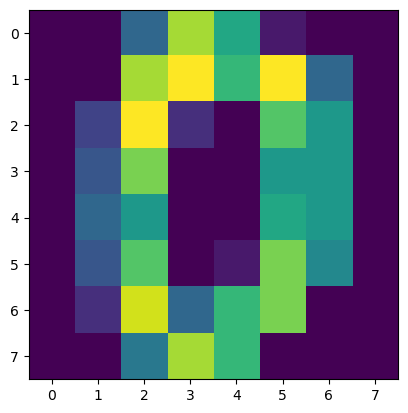

In [130]:
# pour comparer avec l'image initiale
plt.imshow(images[0])

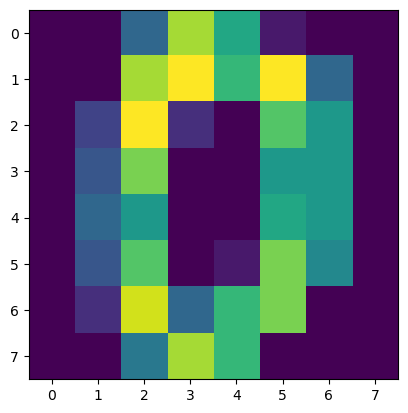

In [131]:
# pour comparer avec l'image initiale
plt.imshow(X[0].reshape((8,8)))

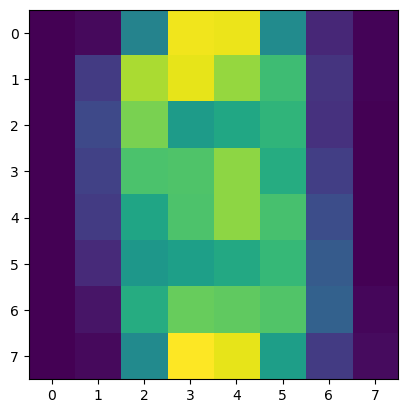

In [135]:
# Permet de voir ce qui se passe quand on diminue n_components 
# et donc qu'on fait baisser le % de la variance qui est préservé

model = PCA(n_components=1) 
X_reduced = model.fit_transform(X)
X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))

### On peut écrire directement n_components = 95%

Nb de composantes utilisées : 29 pour préserver 0.95 de la variance


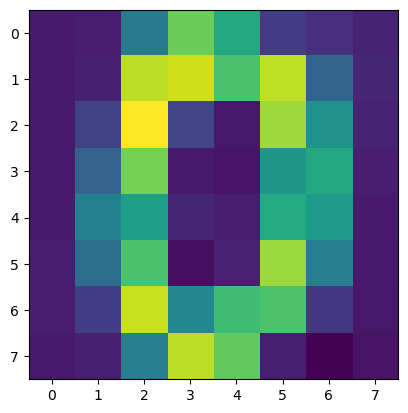

In [139]:
MyPercent = .95
model = PCA(n_components = MyPercent) 
X_reduced = model.fit_transform(X)
X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))
print(f"Nb de composantes utilisées : {model.n_components_} pour préserver {MyPercent} de la variance")

### Points importants
1. Il faut standardiser les données (StandardScaler()) avant d'utiliser PCA
    * Les axes en composantes principale partent tous de l'origine des données
    * Faut aussi une variance égale à 1
1. Faut des variables continues
1. PCA n'est pas efficace sur des datasets non-linéaires
    * On utilisera alors des technique de Manifold Learning (IsoMap, T-SNE)